# Chapter 3 Exercise Solutions

---

#### Exercise 3.1

Checking $B(k)$ condition

$$ \begin{align*}
  j &= 1: & b_1 + b_2 &= \frac{1}{2} + \frac{1}{2} = 1, \\
  j &= 2: & b_1c_1 + b_2c_2 &= \frac{1}{2} \left( \frac{1}{4} \right) + \frac{1}{2} \left( \frac{3}{4} \right) = \frac{1}{2}, \\
  j &= 3: & b_1c_1^2 + b_2c_2^2 &= \frac{1}{2} \left( \frac{1}{16} \right) + \frac{1}{2} \left( \frac{9}{16} \right) = \frac{5}{16}.
\end{align*} $$

So $B(2)$ is satisfied. Checking $C(1)$

$$ \begin{align*}
  i &= 1: && LHS: a_{11} + a_{12} = \frac{1}{4} + 0 = \frac{1}{4}, \\
  &&& RHS: c_1 = \frac{1}{4}, \\
  i &= 2: && LHS: a_{21} + a_{22} = \frac{1}{2} + \frac{1}{4} = \frac{3}{4}, \\
  &&& RHS: c_2 = \frac{3}{4}.
\end{align*} $$

So $C(1)$ is satisfied. Checking $D(1)$

$$ \begin{align*}
  j &= 1: && LHS: b_1a_{11} + b_2a_{21} = \frac{1}{2}\left( \frac{1}{4} \right) + \frac{1}{2} \left( \frac{1}{2} \right) = \frac{3}{8}, \\
  &&& RHS: b_1(1 - c_1) = \frac{1}{2}\left( 1 - \frac{1}{4} \right) = \frac{3}{8}, \\
  j &= 2: && LHS: b_1a_{12} + b_2a_{22} = \frac{1}{2} (0) + \frac{1}{2} \left( \frac{1}{4} \right) = \frac{1}{8}, \\
  &&& RHS: b_2 (1 - c_!) = \frac{1}{2} \left( 1 - \frac{3}{4} \right) = \frac{1}{8}.
\end{align*} $$

Since $B(2)$, $C(1)$ and $D(1)$ are satisfied this is a second-order method.

---

#### Exercise 3.2

In [47]:
import sympy as sp

# Define symbolic variables
a11, a12, a21, a22, b1, b2, c1, c2, x = sp.symbols("a11, a12, a21, a22, b1, b2, c1, c2, x")

# Calculate c values
def legendre(n):
    x = sp.symbols('x')
    P = 0
    for i in range(n + 1):
        P += sp.binomial(n, i) * sp.binomial(n + i, i) * (x - 1) ** i

    return P


P = legendre(2) - legendre(1)
c1, c2 = sp.solve(P)
print(f"c1 = {c1}\nc2 = {c2}")

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b1 * c1 + b2 * c2 - sp.Rational(1,2)
eq3 = a11 + a12 - c1
eq4 = a21 + a22 - c2
eq5 = a11 * c1 + a12 * c2 - sp.Rational(1,2) * c1 ** 2
eq6 = a21 * c1 + a22 * c2 - sp.Rational(1,2) * c2 ** 2

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))

c1 = 1/3
c2 = 1


{a11: 5/12, a12: -1/12, a21: 3/4, a22: 1/4, b1: 3/4, b2: 1/4}

So the third-order Radau IIA method is

$$ \begin{align*}
  \begin{array}{c|cc}
    \frac{1}{3} & \frac{5}{12} & -\frac{1}{12} \\
    1 & \frac{3}{4} & \frac{1}{4} \\ 
    \hline
    & \frac{3}{4} & \frac{1}{4}
  \end{array}
\end{align*} $$

---

#### Exercise 3.3

(a)

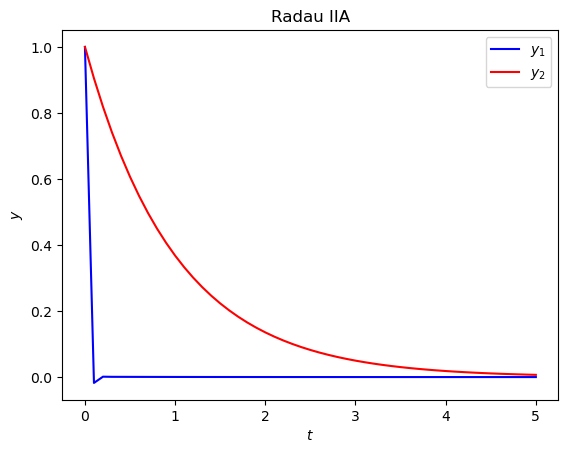

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jac(f, t, y):
    J = np.zeros((len(y), len(y)))
    epsilon = 1e-6
    for i in range(len(y)):
        y_plus_epsilon = y.astype(float)
        y_plus_epsilon[i] += epsilon
        J[:,i] = (f(t, y_plus_epsilon) - f(t,y)) / epsilon

    return J


def radauIIA(f, tpsan, y0, h):
    
    N = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, N))
    t[0] = tspan[0]
    y[0,:] = y0
    
    A = np.array([[5/12, -1/12],
                  [3/4, 1/4]])
    b = np.array([3/4, 1/4])
    c = np.array([1/3, 1])
    s = 2

    for n in range(nsteps):
        z = np.zeros(N * s)
        F = np.zeros(N * s)
        J = jac(f, t[n], y[n,:])
        for k in range(10):
            F[:N] = f(t[n] + c[0] * h, y[n,:] + z[:N])
            F[N:] = f(t[n] + c[1] * h, y[n,:] + z[N:])
            g = z - h * np.dot(np.kron(A, np.eye(N)), F)
            delta_z = np.linalg.solve(np.eye(N * s) - h * np.kron(A, J), -g)
            z += delta_z
            if np.linalg.norm(delta_z) < 1e-6:
                break
        
        y[n+1,:] = y[n,:] + h * np.dot(np.kron(b.T, np.eye(N)), F)
        t[n+1] = t[n] + h

    return t, y


def f(t, y):
    return np.array([-1000 * y[0] + y[1], -y[1]])

# Define IVP
tspan = [0, 5]
y0 = [1, 1]
h = 0.1

# Solve IVP
t, y = radauIIA(f, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b", label="$y_1$")
plt.plot(t, y[:,1], "r", label="$y_2$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("Radau IIA")
plt.legend()
plt.show()

(b)

/var/folders/wh/swh6wpk951n9mdfbmhgnf1g80000gn/T/ipykernel_68932/2085441569.py:51: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([-1000 * y[0] + y[1], -y[1]])
/var/folders/wh/swh6wpk951n9mdfbmhgnf1g80000gn/T/ipykernel_68932/2980626299.py:17: RuntimeWarning: invalid value encountered in add
  y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4);


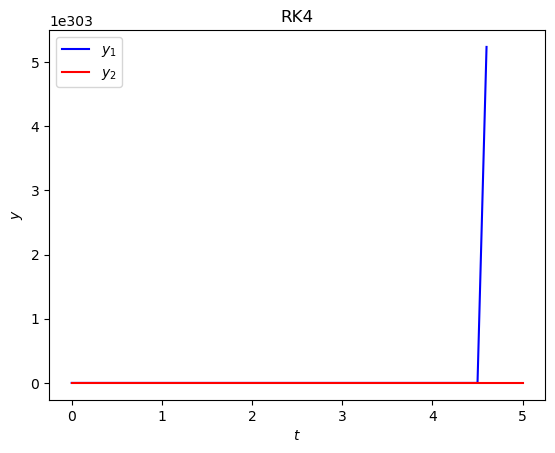

In [52]:
# Define RK4 method function
def rk4(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    m = len(y0)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, m))

    t[0] = tspan[0]
    y[0,:] = y0
    
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4);
        t[n+1] = t[n] + h

    return t, y


# Solve IVP
t, y = rk4(f, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b", label="$y_1$")
plt.plot(t, y[:,1], "r", label="$y_2$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("RK4")
plt.legend()
plt.show()

The RK4 method is unstable for this problem and choice of step length.

(c)

In [60]:
# Define RKF45 method function
def rkf45(f, tspan, y0, atol=1e-6, rtol=1e-3):
  
    m = len(y0)
    t = np.zeros(100000)
    y = np.zeros((100000, m)) 
    t[0] = tspan[0]
    y[0,:] = y0
    
    h = 0.8 * rtol ** (1 / 5)
    n = 0
    while t[n] < tspan[-1]:

        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/4 * h, y[n,:] + 1/4 * h * k1)
        k3 = f(t[n] + 3/8 * h, y[n,:] + h * (3/32*k1 + 9/32 * k2))
        k4 = f(t[n] + 12/13 * h, y[n,:] + h * (1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3))
        k5 = f(t[n] + h, y[n,:] + h * (439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4))
        k6 = f(t[n] + 1/2 * h, y[n,:] + h * (-8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5))

        y5 = y[n,:] + h * (16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6)
        y4 = y[n,:] + h * (25/216 * k1 + 1408/2565 * k3 + 2197/4104 * k4 - 1/5 * k5)

        delta = np.linalg.norm(y5 - y4)
        tol = atol + rtol * np.min(np.abs(y5))
        if delta < tol:
            y[n+1,:] = y5
            t[n+1] = t[n] + h
            n += 1
        
        r = max(0.1, 0.8 * (tol / delta) ** (1/5))
        h = min(r * h, tspan[-1] - t[n])

    return t[:n+1], y[:n+1,:]


# Solve IVP using RKF45 and Radau IIA methods and record the time taken and compute the smallest step length used for RKF45
start = time.time()
t_rkf45, y_rkf45 = rkf45(f, tspan, y0)
rkf45_time = time.time() - start

start = time.time()
t, y_radauIIA = radauIIA(f, tspan, y0, h)
radauIIA_time = time.time() - start

print(f"RKF45 time:     {rkf45_time:0.3f} seconds")
print(f"Radau IIA time: {radauIIA_time:0.3f} seconds")
print(f"\nSmallest step length used by RKF45: {np.min(t_rkf45[1:] - t_rkf45[:-1]):0.6f}")


RKF45 time:     0.053 seconds
Radau IIA time: 0.004 seconds

Smallest step length used by RKF45: 0.000427
